In [346]:
import importlib
importlib.reload(VRPSolver)

<module 'VRPSolver' from 'C:\\Users\\Saldern\\jupyter\\vrp\\VRPSolver.py'>

In [347]:
import glob
import scipy

import VRPSolver
%matplotlib inline

instances = glob.glob('./instances/*.txt')
slv = VRPSolver.VRPSolver(instances[0], 10, 8)

101


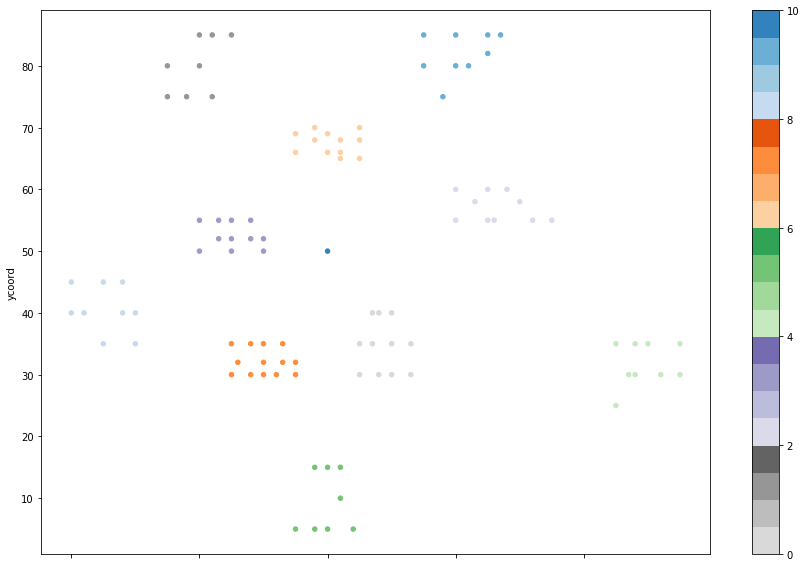

In [348]:
slv.df.plot.scatter(0, 1, c=slv.df.cluster, colormap='tab20c_r', figsize=(15,10))
print(slv.df.shape[0])

In [349]:
slv.df.sort_values('ready_time').head(10)

,xcoord,ycoord,demand,ready_time,due_date,service_time,cluster
cust_no,,,,,,,
0,40,50,0,0,1236,0,10
20,30,50,10,10,265,90,3
67,47,40,10,12,275,90,0
65,48,40,10,12,223,90,0
5,42,65,10,15,226,90,6
24,25,50,10,15,333,90,3
3,42,66,10,16,336,90,6
43,33,35,10,16,273,90,7
42,33,32,20,19,345,90,7


In [350]:
slv.df.groupby('cluster').demand.sum()

cluster
0     200
1     190
2     170
3     170
4     150
5     200
6     180
7     160
8     200
9     190
10      0
Name: demand, dtype: int32

In [351]:
n_vehicles, initial_solution, cost = slv.get_initial_solution(0)
print(n_vehicles, cost, slv.is_solution_feasible(solution))

C:\Users\Saldern\jupyter\vrp\VRPSolver.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Saldern\jupyter\vrp\VRPSolver.py:300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  print()


add route [0, 5, 3, 8, 7, 11, 10, 6, 9, 2, 4, 75, 1, 0]
add route [0, 13, 18, 17, 15, 19, 14, 16, 12, 0]
add route [0, 20, 25, 24, 29, 27, 28, 30, 23, 26, 21, 22, 0]
add route [0, 32, 33, 31, 35, 38, 37, 36, 39, 34, 0]
add route [0, 43, 41, 42, 44, 40, 45, 46, 51, 48, 52, 50, 49, 0]
add route [0, 47, 0]
add route [0, 55, 54, 57, 56, 53, 60, 58, 59, 0]
add route [0, 65, 67, 63, 62, 72, 74, 61, 68, 64, 66, 69, 0]
add route [0, 81, 78, 71, 76, 73, 70, 79, 77, 80, 0]
add route [0, 90, 86, 87, 82, 83, 85, 84, 89, 88, 91, 0]
add route [0, 98, 96, 95, 94, 93, 92, 100, 97, 99, 0]
11 974.1132163228089 True


In [354]:
initial_solution

[[0, 5, 3, 8, 7, 11, 10, 6, 9, 2, 4, 75, 1, 0],
 [0, 13, 18, 17, 15, 19, 14, 16, 12, 0],
 [0, 20, 25, 24, 29, 27, 28, 30, 23, 26, 21, 22, 0],
 [0, 32, 33, 31, 35, 38, 37, 36, 39, 34, 0],
 [0, 43, 41, 42, 44, 40, 45, 46, 51, 48, 52, 50, 49, 0],
 [0, 47, 0],
 [0, 55, 54, 57, 56, 53, 60, 58, 59, 0],
 [0, 65, 67, 63, 62, 72, 74, 61, 68, 64, 66, 69, 0],
 [0, 81, 78, 71, 76, 73, 70, 79, 77, 80, 0],
 [0, 90, 86, 87, 82, 83, 85, 84, 89, 88, 91, 0],
 [0, 98, 96, 95, 94, 93, 92, 100, 97, 99, 0]]

Начальное решение выглядит так

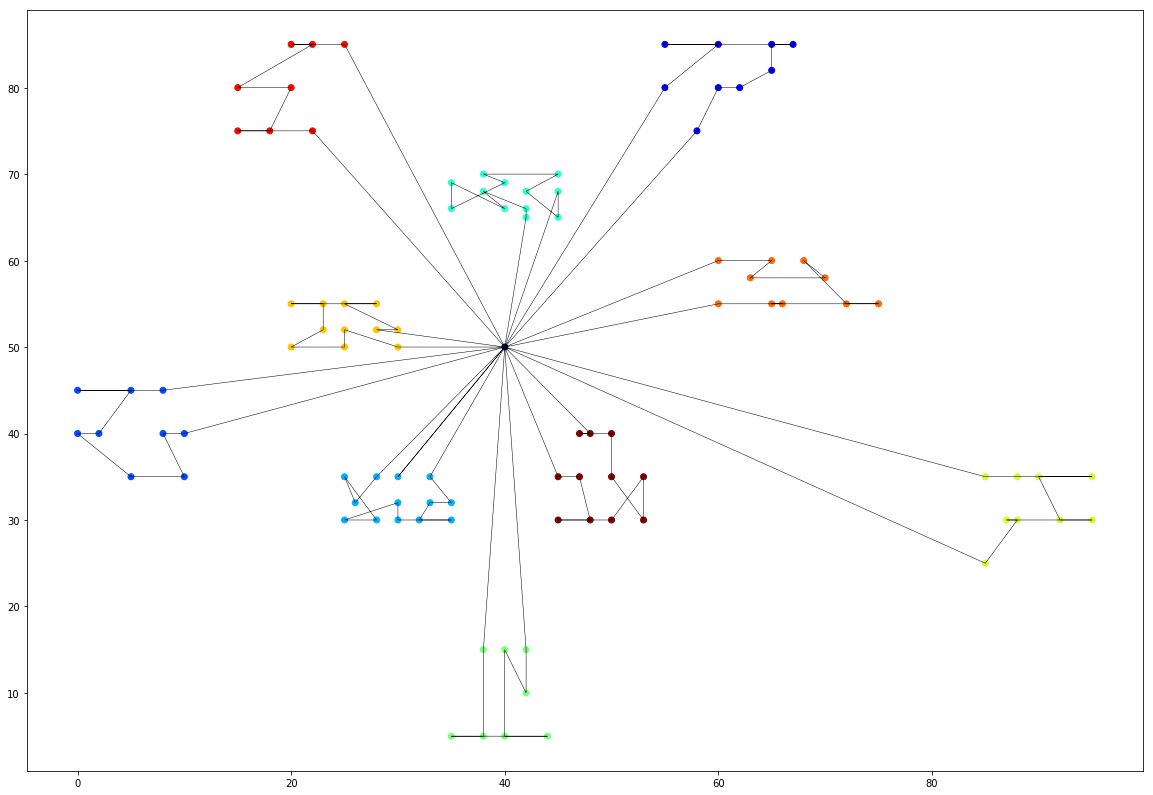

In [360]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))
plt.scatter(slv.df.xcoord, slv.df.ycoord, c=slv.df.cluster, cmap='jet_r')
for route in initial_solution:
    plt.plot(slv.df.xcoord[route], slv.df.ycoord[route], linewidth=0.5, color='black')

In [398]:
solution = np.array(list(map(np.array, initial_solution)))
history = History(solution, cost)
old_cost = slv.solution_cost(solution)
LocalSearch(solution, is_feasible=slv.is_solution_feasible, cost=slv.solution_cost)
if (old_cost > slv.solution_cost(solution)):
    history.append(solution, slv.solution_cost(solution))
    print(slv.solution_cost(solution))
old_cost = slv.solution_cost(solution)
for i in range(10):
    print('Perturbing')
    Perturbation(solution)
    print('Looking for better and feasible')
    print(slv.is_solution_feasible(solution), old_cost, slv.solution_cost(solution))
    n = 0
    while not slv.is_solution_feasible(solution) or old_cost <= slv.solution_cost(solution):
        LocalSearch(solution, is_feasible=slv.is_solution_feasible, cost=slv.solution_cost)
        n += 1
    print('Found after {} iterations'.format(n))
    old_cost = slv.solution_cost(solution)
    history.append(solution, slv.solution_cost(solution))

#solution_pert = Perturbation(solution, history)
#solution_new = LocalSearch(solution_pert)
#acc = AcceptSolution(solution_new, history)
#if acc:
#    break


Perturbing
Looking for better and feasible
True 974.1132163228089 982.8287505005031
Found after 38 iterations
Perturbing
Looking for better and feasible
True 972.6542218165483 996.7719747954526
Found after 90 iterations
Perturbing
Looking for better and feasible
True 972.3820162885462 978.0567895162438
Found after 45 iterations
Perturbing
Looking for better and feasible
True 967.8920940818106 988.1673358620079
Found after 45 iterations
Perturbing
Looking for better and feasible
True 966.2753892189208 963.8369456690849
Found after 0 iterations
Perturbing
Looking for better and feasible
True 963.8369456690849 975.2813687264268
Found after 31 iterations
Perturbing
Looking for better and feasible
True 963.1392331026957 956.064702163809
Found after 0 iterations
Perturbing
Looking for better and feasible
True 956.064702163809 963.1392331026957
Found after 30 iterations
Perturbing
Looking for better and feasible
True 955.0178255928913 947.9432946540046
Found after 0 iterations
Perturbing
Look

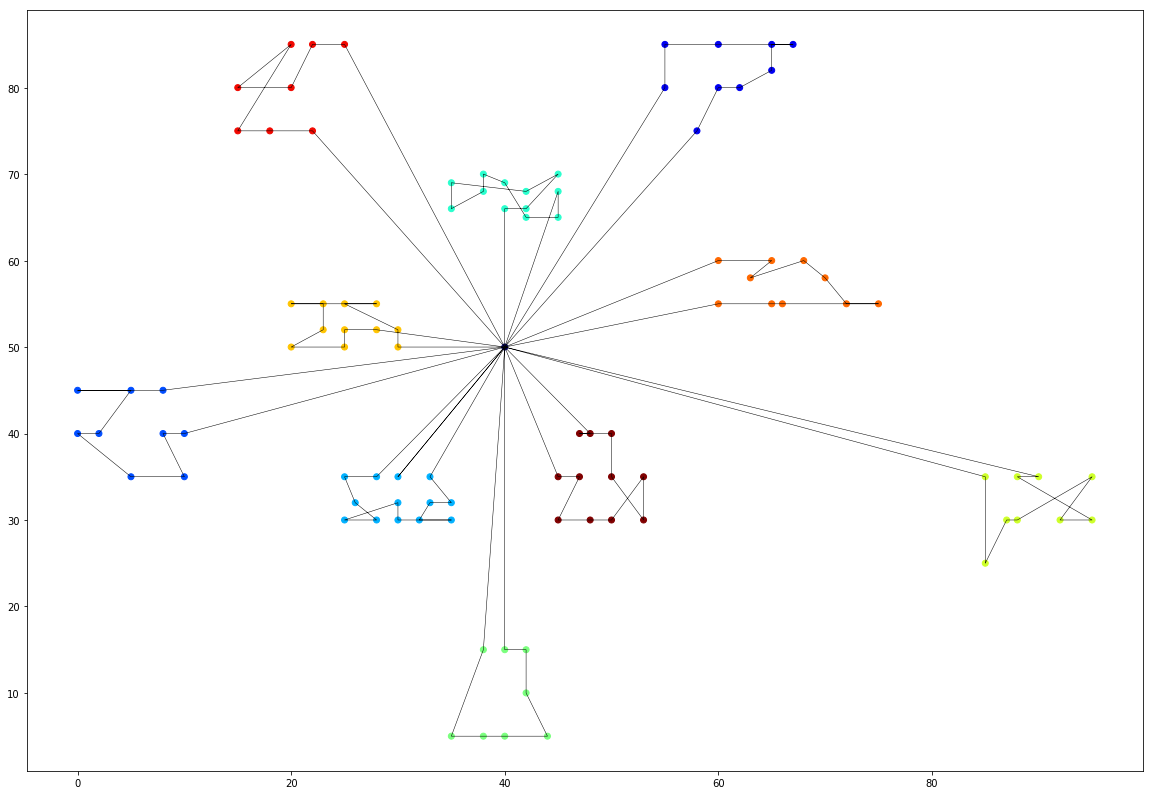

In [399]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))
plt.scatter(slv.df.xcoord, slv.df.ycoord, c=slv.df.cluster, cmap='jet_r')
for route in solution:
    plt.plot(slv.df.xcoord[route], slv.df.ycoord[route], linewidth=0.5, color='black')

In [387]:
np.array(list(map(np.array, initial_solution)))

array([array([ 0,  5,  3,  8,  7, 11, 10,  6,  9,  2,  4, 75,  1,  0],
      dtype=int64),
       array([ 0, 13, 18, 17, 15, 19, 14, 16, 12,  0], dtype=int64),
       array([ 0, 20, 25, 24, 29, 27, 28, 30, 23, 26, 21, 22,  0], dtype=int64),
       array([ 0, 32, 33, 31, 35, 38, 37, 36, 39, 34,  0], dtype=int64),
       array([ 0, 43, 41, 42, 44, 40, 45, 46, 51, 48, 52, 50, 49,  0],
      dtype=int64),
       array([ 0, 47,  0], dtype=int64),
       array([ 0, 55, 54, 57, 56, 53, 60, 58, 59,  0], dtype=int64),
       array([ 0, 65, 67, 63, 62, 72, 74, 61, 68, 64, 66, 69,  0], dtype=int64),
       array([ 0, 81, 78, 71, 76, 73, 70, 79, 77, 80,  0], dtype=int64),
       array([ 0, 90, 86, 87, 82, 83, 85, 84, 89, 88, 91,  0], dtype=int64),
       array([  0,  98,  96,  95,  94,  93,  92, 100,  97,  99,   0], dtype=int64)],
      dtype=object)

In [386]:
import numpy as np

class History:
    def __init__(self, s=None, c=None):            
        self.solutions = list()
        self.cost = list()
        if s is not None:
            self.solutions.append(s)
        if c is not None:
            self.cost.append(c)

    def append(self, s, c):
        self.solutions.append(s)
        self.cost.append(c)
        
    def __getitem__(self, i):
        return self.solutions[i], self.cost[i]
    
    def __print__(self):
        return self.solutions, self.cost
        
    def __str__(self):
        return '[{}]'.format(', '.join(['{:.3f}'.format(c) for s, c in zip (self.solutions, self.cost)]))
    
    def __repr__(self):
        return '[{}]'.format(', '.join(['{:.3f}'.format(c) for s, c in zip (self.solutions, self.cost)]))
        
def LocalSearch(solution, is_feasible, cost):
    def _2op_move(route):
        client_i = np.random.randint(1, len(route) - 1)

        client_2i = client_i
        while client_2i == client_i:
            client_2i = np.random.randint(1, len(route) - 1)
        
        route[client_i], route[client_2i] = route[client_2i], route[client_i]
        return route
    
    def _2swap(route):
        client_i = np.random.randint(1, len(route) - 2)
        route[client_i], route[client_i + 1] = route[client_i + 1], route[client_i]
        return route
    
    route_i = np.random.randint(0, len(solution))
    while len(solution[route_i]) <= 3:
        route_i = np.random.randint(0, len(solution))
    route = solution[route_i]
    old_cost = cost(solution)
    solution[route_i] = _2swap(np.copy(route))
    if not is_feasible(solution) or old_cost <= cost(solution):
        solution[route_i] = route

        
def Perturbation(solution):
    def double_bridge(route):
        subroutes = np.array_split(route[1:-1], 4)
        for i in subroutes:
            i[0], i[-1] = i[-1], i[0]

        return np.hstack([0] + subroutes + [0])
    
    route_i = np.random.randint(0, len(solution))
    while len(solution[route_i]) <= 9:
        route_i = np.random.randint(0, len(solution))
    route = solution[route_i]
    solution[route_i] = double_bridge(route)

SyntaxError: invalid syntax (<ipython-input-386-68ca6c7e152b>, line 23)

In [341]:
a = np.arange(10)*3
print(a)
subroutes = np.array_split(a[1:-1], 4)
print(subroutes)
for i in subroutes:
    i[0], i[-1] = i[-1], i[0]

np.hstack([0] + subroutes + [0])

[ 0  3  6  9 12 15 18 21 24 27]
[array([3, 6]), array([ 9, 12]), array([15, 18]), array([21, 24])]


array([ 0,  6,  3, 12,  9, 18, 15, 24, 21,  0])